In [3]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import pickle

In [2]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')


ModuleNotFoundError: No module named 'google.colab'

In [3]:
# import os
# os.chdir("/content/drive/")

In [4]:
# %cd MyDrive/Colab Notebooks/Room Classification

In [5]:
with open('X.pickle','rb') as f:
  X = pickle.load(f)

In [6]:
X.shape

(8239, 150, 150, 3)

In [7]:
X = X/255

In [8]:
with open('y.pickle','rb') as f:
  y = pickle.load(f)

In [9]:
y.shape

(8239,)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, shuffle=True)

In [11]:
X_train.shape

(6591, 150, 150, 3)

In [12]:
y_train.shape

(6591,)

In [13]:
X_test.shape

(1648, 150, 150, 3)

In [14]:
y_test.shape

(1648,)

In [15]:
# with open('X_train.pickle','wb') as f:
#   pickle.dump(X_train,f)

# with open('X_test.pickle','wb') as f:
#   pickle.dump(X_test,f)

In [16]:
# with open('y_train.pickle','wb') as f:
#   pickle.dump(y_train,f)

# with open('y_test.pickle','wb') as f:
#   pickle.dump(y_test,f)

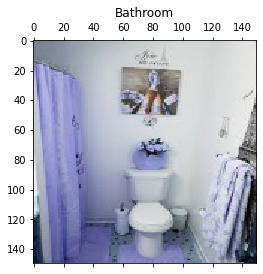

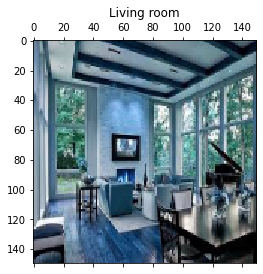

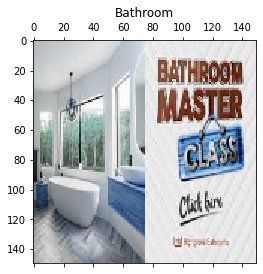

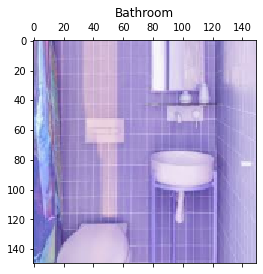

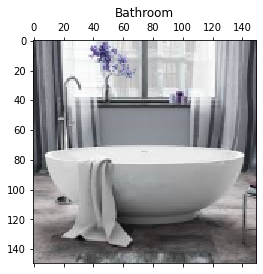

In [17]:
for i in range(5):
  plt.matshow(X_train[i])
  if y_train[i] == 1:
    title = 'Living room'
  else:
    title = 'Bathroom'
  plt.title(title)

#Training

In [18]:
model = keras.Sequential([
                          keras.Input(shape=(150,150,3)),
                          
                          keras.layers.Conv2D(filters=32, kernel_size=(7,7), strides=(1,1), activation='relu'),
                          keras.layers.MaxPool2D(pool_size=(2,2)),
                          # keras.layers.Dropout(0.3),

                          keras.layers.Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), activation='relu'),
                          keras.layers.MaxPool2D(pool_size=(2,2)),
                          # keras.layers.Dropout(0.3),

                          keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu'),
                          keras.layers.MaxPool2D(pool_size=(2,2)),
                          keras.layers.Dropout(0.25),

                          keras.layers.Flatten(),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [19]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 144, 144, 32)      4736      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 72, 72, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 68, 68, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0

In [20]:
model.fit(X_train, y_train, epochs=10)


Epoch 1/10
206/206 [==============================] - 38s 119ms/step - loss: 0.6367 - accuracy: 0.6367
Epoch 2/10
206/206 [==============================] - 23s 110ms/step - loss: 0.4210 - accuracy: 0.8075
Epoch 3/10
206/206 [==============================] - 23s 111ms/step - loss: 0.3309 - accuracy: 0.8599
Epoch 4/10
206/206 [==============================] - 23s 111ms/step - loss: 0.2921 - accuracy: 0.8788
Epoch 5/10
206/206 [==============================] - 23s 112ms/step - loss: 0.2709 - accuracy: 0.8816
Epoch 6/10
206/206 [==============================] - 23s 111ms/step - loss: 0.2038 - accuracy: 0.9198
Epoch 7/10
206/206 [==============================] - 23s 112ms/step - loss: 0.1727 - accuracy: 0.9269
Epoch 8/10
206/206 [==============================] - 23s 113ms/step - loss: 0.1552 - accuracy: 0.9368
Epoch 9/10
206/206 [==============================] - 23s 112ms/step - loss: 0.0997 - accuracy: 0.9617
Epoch 10/10
206/206 [==============================] - 24s 118ms/step - l

In [21]:
model.save('model1.h5')

# Evaluation and Summary

In [22]:
model.evaluate(X_test, y_test)

52/52 [==============================] - 3s 51ms/step - loss: 0.3835 - accuracy: 0.8756


[0.3834662139415741, 0.8756067752838135]

In [23]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 144, 144, 32)      4736      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 72, 72, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 68, 68, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0

In [24]:
model.predict(np.array([X_test[0]]))

array([[0.4702852]], dtype=float32)